In [1]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# These are constants used in the following functions
PI=np.pi
PI2 = 2*np.pi

### Converting from Spherical to Cartesian and Back

This notebook uses the conventions as described in: http://mathworld.wolfram.com/SphericalCoordinates.html

In [2]:
def spherical_to_cartesian(r, theta, phi):
    """
    Convert from spherical to cartesian coordinates
       theta - azimut - can be either a value or an array
       phi - inclination - can be either a value or an array
    """
    x = r * np.cos(theta) * np.sin(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(phi)
    return x, y, z

def cartesian_to_spherical(x, y, z):
    """
    Convert from cartesian to spherical
    """
    r = np.sqrt(np.square(x) + np.square(y) + np.square(z))
    if r == 0:
        return 0, 0, 0 # limit case when x, y and z are 0
    phi = np.acos(z,r)
    theta = np.atan2(y, x)
    return r, theta, phi


### Displaying Curves and Surphases using Spherical Coordinates

In [3]:
def plot_curve(ax, r, theta, phi, **options):
    """
    Plot a curve on the axes ax
    r - scalar
    theta - array
    phi - array
    """
    x, y, z = spherical_to_cartesian(r, theta, phi)
    ax.plot(x, y, z, **options)

In [4]:
def plot_surface(ax, r, theta, phi, **options):
    """
    Plot a surface
    r - scalar
    theta - an array
    phi - an array
    """
    # The following creates two arrays, theta2 and phi2 which define a grid with all combinations 
    # between theta and phi - see https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    theta2, phi2 = np.meshgrid(theta, phi) 
    x2, y2, z2 = spherical_to_cartesian(r, theta2, phi2)
    ax.plot_surface(x2, y2, z2, rstride = 4, cstride = 4, linewidth = 2, **options)

In [5]:
def plot_wedge(ax, r, start_theta = 0, end_theta = PI2, **options):
    """
    Plots a spherical wedge - see https://en.wikipedia.org/wiki/Spherical_wedge for what a wedge is
    """
    N = 100
    sector_theta = np.linspace(start_theta, end_theta, N)
    sector_phi = np.linspace(0, np.pi, N)
    plot_surface(ax, r, sector_theta, sector_phi, **options)

In [6]:
def plot_beach_ball():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('equal')
    ax.view_init(elev = 30, azim = 45)
    ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")

    colors = 'bwywmw'
    for i in range(0, 6):
        start = PI2 / 6 * i
        end = start + PI2 / 6
        plot_wedge(ax, 1, start, end, color= colors[i], alpha = 1)        

<IPython.core.display.Javascript object>


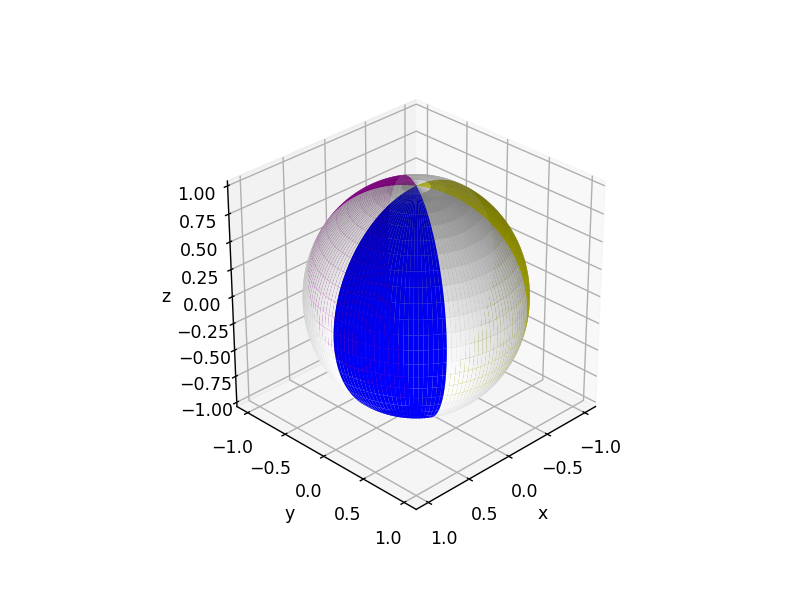

In [7]:
plot_beach_ball()